In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# dataframe for demand log
df_demand_log = pd.read_excel('FruitSoul Demand Log Fixed.xlsx')
df_demand_log['Earliest Delivery Date'] = df_demand_log['Earliest Delivery Date'].dt.date
df_demand_log['Preferred Delivery Date'] = df_demand_log['Preferred Delivery Date'].dt.date
df_demand_log['Latest Delivery Date'] = df_demand_log['Latest Delivery Date'].dt.date
df_demand_log

,DemandID,Demand Request Date,Mix,Jar Size (vol. ounces),State,Quantity,Earliest Delivery Date,Preferred Delivery Date,Latest Delivery Date
0,1,2021-01-01,Apple-Mango,8,Maryland,1,2021-01-01,2021-01-04,2021-01-07
1,2,2021-01-01,Blueberry-Lemon,32,Kentucky,1,2021-01-04,2021-01-06,2021-01-09
2,3,2021-01-01,Orange-Passionfruit,16,Minnesota,1,2021-01-07,2021-01-10,2021-01-11
3,4,2021-01-01,Orange-Passionfruit,16,California,1,2021-01-07,2021-01-11,2021-01-14
4,5,2021-01-01,Orange-Passionfruit,32,Louisiana,1,2021-01-01,2021-01-04,2021-01-10
...,...,...,...,...,...,...,...,...,...
835374,835375,2023-12-31,Orange-Passionfruit,32,Arizona,1,2023-12-31,2024-01-05,2024-01-13
835375,835376,2023-12-31,Peach-Raspberry,32,California,1,2023-12-31,2024-01-01,2024-01-01
835376,835377,2023-12-31,Blueberry-Lemon,16,Arizona,1,2023-12-31,2024-01-02,2024-01-02
835377,835378,2023-12-31,Strawberry-Kiwi,8,California,1,2023-12-31,2024-01-03,2024-01-03


In [10]:
df_delivery_costs_and_times = pd.read_excel('FruitSoul Expected Delivery Costs and Times.xlsx')
df_delivery_costs_and_times

,Destination State,Approximate distance from Stone Mountain (miles),Expected Delivery Cost From Stone Mountain (USD/ounce),Expected Delivery Time From Stone Mountain (days)
0,Alabama,150,0.9200,1
1,Alaska,3410,2.7750,5
2,Arizona,1840,2.7750,5
3,Arkansas,450,1.0950,3
4,California,2170,2.7750,5
5,Colorado,1210,1.7625,5
6,Connecticut,870,1.4075,5
7,Delaware,690,1.4075,5
8,Florida,440,1.0950,3
9,Georgia,0,0.9100,1


Code in progress...

In [11]:
# Add shipping date columns
# Merge df_demand_log with df_delivery_costs_and_times to get the delivery times for each state
df_merged = df_demand_log.merge(df_delivery_costs_and_times, left_on='State', right_on='Destination State')

# Calculate the new shipping dates
df_merged['Earliest Acceptable Shipping Date'] = df_merged['Earliest Delivery Date'] - pd.to_timedelta(df_merged['Expected                     Delivery Time     From Stone Mountain (days)'], unit='d')
df_merged['Preferred Shipping Date'] = df_merged['Preferred Delivery Date'] - pd.to_timedelta(df_merged['Expected                     Delivery Time     From Stone Mountain (days)'], unit='d')
df_merged['Latest Acceptable Shipping Date'] = df_merged['Latest Delivery Date'] - pd.to_timedelta(df_merged['Expected                     Delivery Time     From Stone Mountain (days)'], unit='d')

# Drop the extra columns from the merge
df_demand_log = df_merged.drop(columns=['Destination State', 'Approximate distance from Stone Mountain (miles)', 'Expected Delivery Cost From Stone Mountain (USD/ounce)', 'Expected                     Delivery Time     From Stone Mountain (days)'])

/var/folders/1g/8vbqswf55db7cq6z4fs9npbr0000gn/T/ipykernel_85296/1284135513.py:6: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized.
  df_merged['Earliest Acceptable Shipping Date'] = df_merged['Earliest Delivery Date'] - pd.to_timedelta(df_merged['Expected                     Delivery Time     From Stone Mountain (days)'], unit='d')
/var/folders/1g/8vbqswf55db7cq6z4fs9npbr0000gn/T/ipykernel_85296/1284135513.py:7: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized.
  df_merged['Preferred Shipping Date'] = df_merged['Preferred Delivery Date'] - pd.to_timedelta(df_merged['Expected                     Delivery Time     From Stone Mountain (days)'], unit='d')
/var/folders/1g/8vbqswf55db7cq6z4fs9npbr0000gn/T/ipykernel_85296/1284135513.py:8: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized.
  df_merged['Latest Acceptable Shipping Date'] = df_merged['Latest Delivery Date'

In [14]:
# Ensure date columns are in datetime (I'm getting an error, not sure if this is neccessary)
df_demand_log['Earliest Delivery Date'] = pd.to_datetime(df_demand_log['Earliest Delivery Date'])
df_demand_log['Preferred Delivery Date'] = pd.to_datetime(df_demand_log['Preferred Delivery Date'])
df_demand_log['Latest Delivery Date'] = pd.to_datetime(df_demand_log['Latest Delivery Date'])
df_demand_log['Demand Request Date'] = pd.to_datetime(df_demand_log['Demand Request Date'])

# If the shipping date columns are not already datetime, also ensure they are converted
df_demand_log['Earliest Acceptable Shipping Date'] = pd.to_datetime(df_demand_log['Earliest Acceptable Shipping Date'])
df_demand_log['Preferred Shipping Date'] = pd.to_datetime(df_demand_log['Preferred Shipping Date'])
df_demand_log['Latest Acceptable Shipping Date'] = pd.to_datetime(df_demand_log['Latest Acceptable Shipping Date'])

In [15]:
# Calculate the order-to-ship times
df_demand_log['Minimal Order-to-Ship Time'] = (df_demand_log['Earliest Acceptable Shipping Date'] - df_demand_log['Demand Request Date']).dt.days
df_demand_log['Customer-Preferred Order-to-Ship Time'] = (df_demand_log['Preferred Shipping Date'] - df_demand_log['Demand Request Date']).dt.days
df_demand_log['Maximal Order-to-Ship Time'] = (df_demand_log['Latest Acceptable Shipping Date'] - df_demand_log['Demand Request Date']).dt.days

In [16]:
# Computing demand histories
preferred_shipping_demand_history = df_demand_log.groupby(['Preferred Shipping Date', 'Mix']).agg({'Quantity': 'sum'}).reset_index()
earliest_shipping_demand_history = df_demand_log.groupby(['Earliest Acceptable Shipping Date', 'Mix']).agg({'Quantity': 'sum'}).reset_index()
latest_shipping_demand_history = df_demand_log.groupby(['Latest Acceptable Shipping Date', 'Mix']).agg({'Quantity': 'sum'}).reset_index()

# Smoothing
def smooth_demand(row):
    num_days = (row['Latest Acceptable Shipping Date'] - row['Earliest Acceptable Shipping Date']).days + 1
    daily_demand = row['Quantity'] / num_days
    return daily_demand

df_demand_log['Smoothed Daily Demand'] = df_demand_log.apply(smooth_demand, axis=1)

# Agg smoothed demand over range of dates
smoothed_demand_history = []

for _, row in df_demand_log.iterrows():
    for day in pd.date_range(row['Earliest Acceptable Shipping Date'], row['Latest Acceptable Shipping Date']):
        smoothed_demand_history.append({
            'Date': day,
            'Mix': row['Mix'],
            'Smoothed Daily Demand': row['Smoothed Daily Demand']
        })

df_smoothed_demand_history = pd.DataFrame(smoothed_demand_history)
final_smoothed_demand_history = df_smoothed_demand_history.groupby(['Date', 'Mix']).agg({'Smoothed Daily Demand': 'sum'}).reset_index()

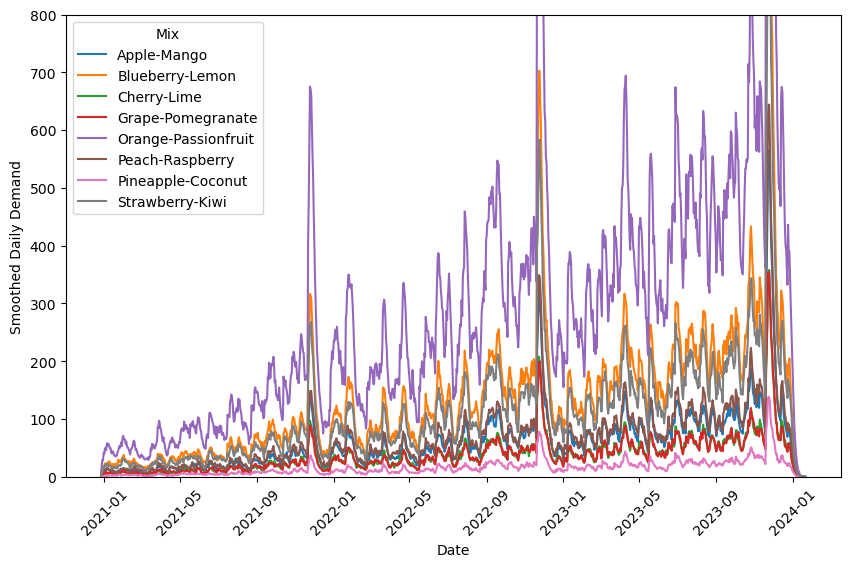

In [31]:
# Group by Mix and plot the smoothed daily demand over time
plt.figure(figsize=(10, 6))
for mix, group in final_smoothed_demand_history.groupby('Mix'):
    plt.plot(group['Date'], group['Smoothed Daily Demand'], label=mix)

plt.xlabel('Date')
plt.ylabel('Smoothed Daily Demand')
plt.legend(title='Mix', loc='upper left')
plt.xticks(rotation=45)
plt.ylim(0, 800)

# Display the plot
plt.show()

In [40]:
df = preferred_shipping_demand_history.groupby('Preferred Shipping Date').agg({'Quantity': 'sum'}).reset_index()

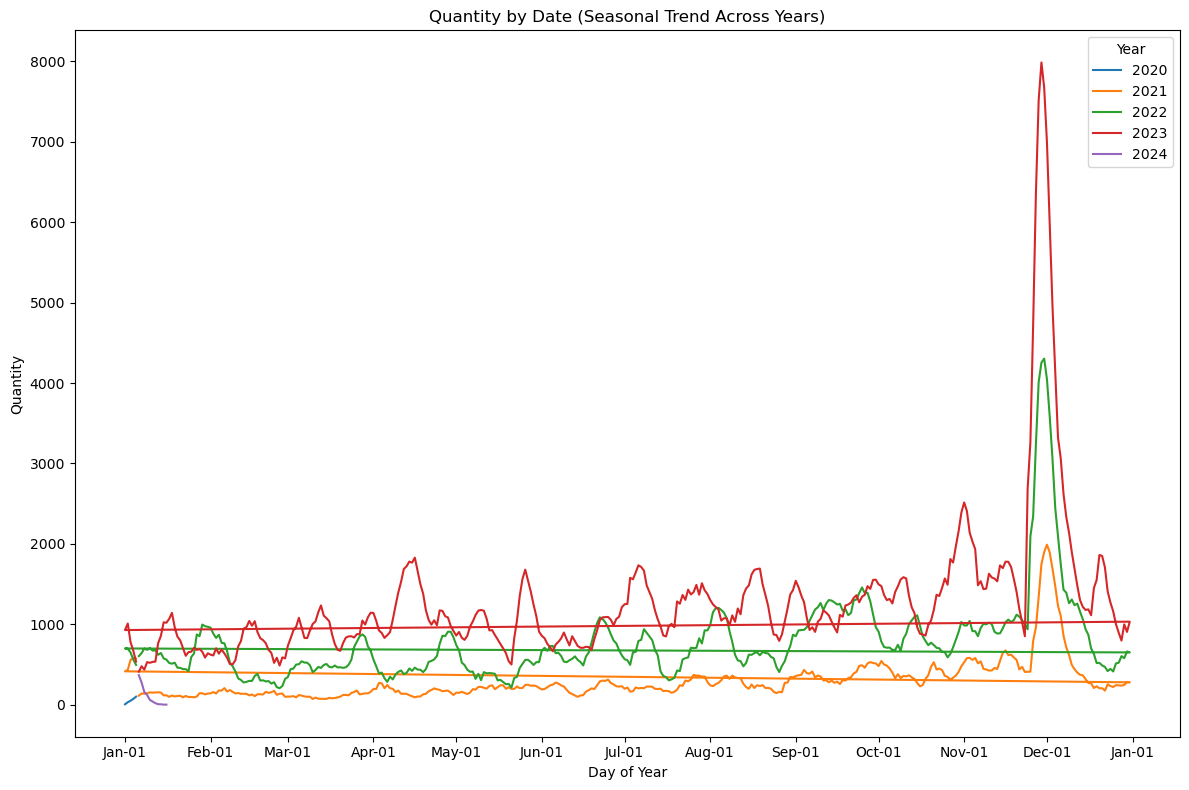

In [48]:
import matplotlib.dates as mdates

df['Preferred Shipping Date'] = pd.to_datetime(df['Preferred Shipping Date'])
df['Day of Year'] = df['Preferred Shipping Date'].dt.strftime('%m-%d')
df['Year'] = df['Preferred Shipping Date'].dt.year

plt.figure(figsize=(12, 8))

for year in df['Year'].unique():
    year_data = df[df['Year'] == year]
    plt.plot(year_data['Day of Year'], year_data['Quantity'], label=str(year))

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))

plt.xlabel('Day of Year')
plt.ylabel('Quantity')
plt.title('Quantity by Date (Seasonal Trend Across Years)')
plt.legend(title='Year')

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

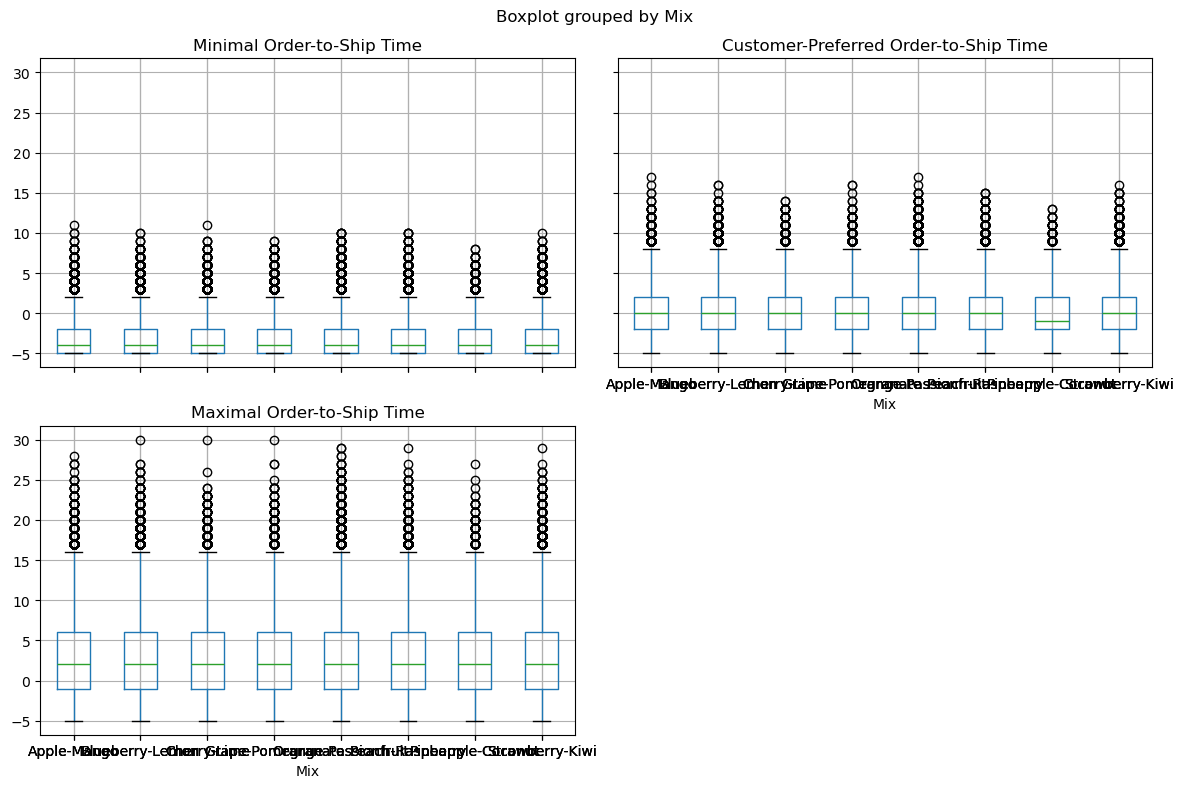

In [55]:
# Creating a boxplot for each Mix across the three specified columns
columns = ['Minimal Order-to-Ship Time', 'Customer-Preferred Order-to-Ship Time', 'Maximal Order-to-Ship Time']

plt.figure(figsize=(12, 8))

# Plot a box and whisker plot for each mix and each of the specified columns
df_demand_log.boxplot(column=columns, by='Mix', figsize=(12, 8))

plt.title(' Order-to-Ship Times by Mix')
plt.xlabel('Mix')
plt.ylabel('Order-to-Ship Time')
# Hide x ticks
plt.tight_layout()
plt.show()

After evaluating the demand of different product mixes a few things stand out:
First, the demand cycles do not appear consistent on a yearly basis, aside from a reliable spike in early December. The second is the demand for each product mix has grown since 2021, and with this increase in volume of demand comes an increase in the volatility of demand. Third, ship estimates are similar across all products, it does not appear certain product mixes follow different shipping patterns/timelines.